In [1]:
from frame_terms import get_frame_terms, get_frame_queries, get_frame_replacements
import pandas as pd
import json


# Retrieve frame terms
frame_words = get_frame_terms()
print("Loaded frames and their terms:", list(frame_words.keys()))

# Optional: Frame queries and replacements
frame_queries = get_frame_queries()
frame_replacements = get_frame_replacements()


Loaded frames and their terms: ['Contributions', 'Crime', 'Culture', 'Deficient', 'Economic', 'Exclusion', 'Family', 'Flood/Tide', 'Labor', 'Legality', 'Quantity', 'Threats', 'Victims', 'Migration']


In [3]:
import pandas as pd
import json

# Define the file path
file_path = "newdata/tone_lines_early.jsonlist"

# Load the .jsonlist file
data = []
with open(file_path, 'r', encoding='utf-8') as f:
    for line in f:
        data.append(json.loads(line.strip()))

# Convert the data into a DataFrame for easier analysis
df = pd.DataFrame(data)

# Display the DataFrame
print(df.head())

# Optionally, save the DataFrame as a CSV file for easier access
output_csv_path = "tone_lines_early.csv"
df.to_csv(output_csv_path, index=False)
print(f"Data saved to {output_csv_path}")


  id           speaker        date                           title  \
0  0   Sir J. Anderson  1940-02-06     Eire Citizens (Immigration)   
1  1   Sir J. Anderson  1940-02-06     Eire Citizens (Immigration)   
2  2  Mr. M. MacDonald  1940-02-14  Palestine (Jewish Immigration)   
3  3     Mr. MacDonald  1940-02-14  Palestine (Jewish Immigration)   
4  4     Mr. MacDonald  1940-02-14  Palestine (Jewish Immigration)   

                                                text               party  \
0  I have had no representations from the police ...  Conservative Party   
1  No, Sir. Even if the principle underlying the ...  Conservative Party   
2  The steady improvement in the internal situati...        Labour Party   
3  The legal quota allowed something over 10,000 ...        Labour Party   
4                          That is another question.        Labour Party   

     label  
0  neutral  
1  neutral  
2      pro  
3  neutral  
4  neutral  
Data saved to tone_lines_early.csv


In [5]:
df.columns

Index(['id', 'speaker', 'date', 'title', 'text', 'party', 'label'], dtype='object')

In [7]:
# Rename columns
df = df.rename(columns={'text': 'contents', 'party': 'Party'})

# Display the updated DataFrame columns
print(df.columns)


Index(['id', 'speaker', 'date', 'title', 'contents', 'Party', 'label'], dtype='object')


In [9]:
df.columns

Index(['id', 'speaker', 'date', 'title', 'contents', 'Party', 'label'], dtype='object')

In [11]:
# Load spaCy language model
import spacy
nlp = spacy.load("en_core_web_sm")

In [12]:

# Step 1: Custom Adjustments
def custom_adjustments(text):
    """Custom text adjustments based on repository preprocessing."""
    # Remove hyphens and join hyphenated words
    text = re.sub(r'(?<!\w)-|-(?!\w)', '', text)
    
    # Normalize possessives (e.g., "immigrant's" -> "immigrant")
    text = re.sub(r"'s\b", "", text)
    
    # Remove speaker names (if they exist in your dataset)
    text = re.sub(r"^\[.*?\]:", "", text)  # Assuming speaker names are bracketed, e.g., "[Speaker]:"
    
    return text

# Step 2: Advanced Cleaning
def advanced_clean_text(text):
    """Perform advanced text cleaning."""
    # Handle missing values
    if not isinstance(text, str):
        return ""
    
    # Replace unwanted characters (e.g., numbers, punctuation, etc.)
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)      # Remove numbers
    text = re.sub(r'\s+', ' ', text)     # Replace multiple spaces with a single space
    text = text.strip().lower()          # Convert to lowercase
    
    return text

# Step 3: Tokenization Using spaCy
def tokenize_with_spacy(text):
    """Tokenize text using spaCy."""
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return tokens

# Complete Preprocessing Pipeline
def preprocess_pipeline(text):
    """Complete preprocessing pipeline."""
    # Step 1: Custom adjustments
    adjusted_text = custom_adjustments(text)
    
    # Step 2: Advanced cleaning
    cleaned_text = advanced_clean_text(adjusted_text)
    
    # Step 3: Tokenization
    tokens = tokenize_with_spacy(cleaned_text)
    
    return cleaned_text, tokens


In [13]:
import re
# Apply preprocessing pipeline
df[['cleaned_contents', 'tokens']] = df['contents'].fillna("").apply(
    lambda x: pd.Series(preprocess_pipeline(x))
)

In [14]:
# Load the dataset
#file_path = 'newdata/preprocessed_data.csv'
#df = pd.read_csv(file_path)

In [15]:
df.head()

,id,speaker,date,title,contents,Party,label,cleaned_contents,tokens
0,0,Sir J. Anderson,1940-02-06,Eire Citizens (Immigration),I have had no representations from the police ...,Conservative Party,neutral,i have had no representations from the police ...,"[representation, police, contrary]"
1,1,Sir J. Anderson,1940-02-06,Eire Citizens (Immigration),"No, Sir. Even if the principle underlying the ...",Conservative Party,neutral,no sir even if the principle underlying the ri...,"[sir, principle, underlie, right, hon, gentlem..."
2,2,Mr. M. MacDonald,1940-02-14,Palestine (Jewish Immigration),The steady improvement in the internal situati...,Labour Party,pro,the steady improvement in the internal situati...,"[steady, improvement, internal, situation, pal..."
3,3,Mr. MacDonald,1940-02-14,Palestine (Jewish Immigration),"The legal quota allowed something over 10,000 ...",Labour Party,neutral,the legal quota allowed something over jews to...,"[legal, quota, allow, jews, settle, palestine,..."
4,4,Mr. MacDonald,1940-02-14,Palestine (Jewish Immigration),That is another question.,Labour Party,neutral,that is another question,[question]


In [19]:
df.columns

Index(['id', 'speaker', 'date', 'title', 'contents', 'Party', 'label',
       'cleaned_contents', 'tokens'],
      dtype='object')

In [20]:
df.head()

,id,speaker,date,title,contents,Party,label,cleaned_contents,tokens
0,0,Sir J. Anderson,1940-02-06,Eire Citizens (Immigration),I have had no representations from the police ...,Conservative Party,neutral,i have had no representations from the police ...,"[representation, police, contrary]"
1,1,Sir J. Anderson,1940-02-06,Eire Citizens (Immigration),"No, Sir. Even if the principle underlying the ...",Conservative Party,neutral,no sir even if the principle underlying the ri...,"[sir, principle, underlie, right, hon, gentlem..."
2,2,Mr. M. MacDonald,1940-02-14,Palestine (Jewish Immigration),The steady improvement in the internal situati...,Labour Party,pro,the steady improvement in the internal situati...,"[steady, improvement, internal, situation, pal..."
3,3,Mr. MacDonald,1940-02-14,Palestine (Jewish Immigration),"The legal quota allowed something over 10,000 ...",Labour Party,neutral,the legal quota allowed something over jews to...,"[legal, quota, allow, jews, settle, palestine,..."
4,4,Mr. MacDonald,1940-02-14,Palestine (Jewish Immigration),That is another question.,Labour Party,neutral,that is another question,[question]


In [21]:
df['cleaned_contents'][2]

'the steady improvement in the internal situation in palestine has been fully maintained i am fully aware of the wholehearted support which is being given by jews throughout the world to the allied cause one of the purposes of which is the freeing of the jews from their cruel persecutors in central europe as regards the third part of the question his majesty government policy allows for a very considerable immigration of jews into palestine over the next few years and there is no question of departing from that policy'

In [22]:
df['tokens'][2]

['steady',
 'improvement',
 'internal',
 'situation',
 'palestine',
 'fully',
 'maintain',
 'fully',
 'aware',
 'wholehearte',
 'support',
 'give',
 'jews',
 'world',
 'allied',
 'cause',
 'purpose',
 'freeing',
 'jews',
 'cruel',
 'persecutor',
 'central',
 'europe',
 'regard',
 'question',
 'majesty',
 'government',
 'policy',
 'allow',
 'considerable',
 'immigration',
 'jews',
 'palestine',
 'year',
 'question',
 'depart',
 'policy']

In [23]:
# Drop the frame_tokens column if it already exists
#df.drop(columns=['frame_tokens'], inplace=True, errors='ignore')
#print("frame_tokens column dropped (if it existed).")


In [24]:
import ast

# Convert the string representation of lists into actual lists
df['tokens'] = df['tokens'].apply(ast.literal_eval)

# Verify the conversion
print(df['tokens'].iloc[2])  # Should print a proper list
print(type(df['tokens'].iloc[2]))  # Should be <class 'list'>


ValueError: malformed node or string: ['representation', 'police', 'contrary']

In [27]:
import ast

# Convert only string representations of lists into actual lists
df['tokens'] = df['tokens'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Verify the conversion
print(df['tokens'].iloc[2])  # Should print a proper list
print(type(df['tokens'].iloc[2]))  # Should be <class 'list'>


['steady', 'improvement', 'internal', 'situation', 'palestine', 'fully', 'maintain', 'fully', 'aware', 'wholehearte', 'support', 'give', 'jews', 'world', 'allied', 'cause', 'purpose', 'freeing', 'jews', 'cruel', 'persecutor', 'central', 'europe', 'regard', 'question', 'majesty', 'government', 'policy', 'allow', 'considerable', 'immigration', 'jews', 'palestine', 'year', 'question', 'depart', 'policy']
<class 'list'>


In [29]:
from nltk.stem import WordNetLemmatizer

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Normalize frame words (lowercase + lemmatize)
normalized_frame_words = {
    frame: [lemmatizer.lemmatize(word.lower()) for word in terms]
    for frame, terms in frame_words.items()
}

# Normalize tokens in the dataset
df['normalized_tokens'] = df['tokens'].apply(
    lambda tokens: [lemmatizer.lemmatize(word.lower()) for word in tokens]
)

# Verify normalization
print(df['normalized_tokens'].iloc[2])


['steady', 'improvement', 'internal', 'situation', 'palestine', 'fully', 'maintain', 'fully', 'aware', 'wholehearte', 'support', 'give', 'jew', 'world', 'allied', 'cause', 'purpose', 'freeing', 'jew', 'cruel', 'persecutor', 'central', 'europe', 'regard', 'question', 'majesty', 'government', 'policy', 'allow', 'considerable', 'immigration', 'jew', 'palestine', 'year', 'question', 'depart', 'policy']


In [30]:
# Define a function to filter tokens for all frames
def filter_tokens_by_frames(row_tokens):
    frame_tokens = {}
    for frame, terms in normalized_frame_words.items():
        # Match tokens for the current frame
        frame_tokens[frame] = [word for word in row_tokens if word in terms]
    return frame_tokens

# Apply the filtering function to create the frame_tokens column
df['frame_tokens'] = df['normalized_tokens'].apply(filter_tokens_by_frames)

# Verify the frame_tokens for a specific row
print(df['frame_tokens'].iloc[2])  # Check the output for row 2


{'Contributions': [], 'Crime': [], 'Culture': [], 'Deficient': [], 'Economic': [], 'Exclusion': ['allow'], 'Family': [], 'Flood/Tide': [], 'Labor': [], 'Legality': [], 'Quantity': [], 'Threats': [], 'Victims': [], 'Migration': []}


In [31]:
df.head()

,id,speaker,date,title,contents,Party,label,cleaned_contents,tokens,normalized_tokens,frame_tokens
0,0,Sir J. Anderson,1940-02-06,Eire Citizens (Immigration),I have had no representations from the police ...,Conservative Party,neutral,i have had no representations from the police ...,"[representation, police, contrary]","[representation, police, contrary]","{'Contributions': [], 'Crime': [], 'Culture': ..."
1,1,Sir J. Anderson,1940-02-06,Eire Citizens (Immigration),"No, Sir. Even if the principle underlying the ...",Conservative Party,neutral,no sir even if the principle underlying the ri...,"[sir, principle, underlie, right, hon, gentlem...","[sir, principle, underlie, right, hon, gentlem...","{'Contributions': [], 'Crime': [], 'Culture': ..."
2,2,Mr. M. MacDonald,1940-02-14,Palestine (Jewish Immigration),The steady improvement in the internal situati...,Labour Party,pro,the steady improvement in the internal situati...,"[steady, improvement, internal, situation, pal...","[steady, improvement, internal, situation, pal...","{'Contributions': [], 'Crime': [], 'Culture': ..."
3,3,Mr. MacDonald,1940-02-14,Palestine (Jewish Immigration),"The legal quota allowed something over 10,000 ...",Labour Party,neutral,the legal quota allowed something over jews to...,"[legal, quota, allow, jews, settle, palestine,...","[legal, quota, allow, jew, settle, palestine, ...","{'Contributions': [], 'Crime': [], 'Culture': ..."
4,4,Mr. MacDonald,1940-02-14,Palestine (Jewish Immigration),That is another question.,Labour Party,neutral,that is another question,[question],[question],"{'Contributions': [], 'Crime': [], 'Culture': ..."


In [32]:
# Verify the frame_tokens for a specific row
df['frame_tokens'].iloc[100]  # Check the output for row 2

{'Contributions': [],
 'Crime': [],
 'Culture': [],
 'Deficient': [],
 'Economic': [],
 'Exclusion': ['allow', 'permit'],
 'Family': [],
 'Flood/Tide': [],
 'Labor': [],
 'Legality': ['permanent'],
 'Quantity': ['number'],
 'Threats': [],
 'Victims': [],
 'Migration': ['land', 'arrive', 'travel', 'travel', 'travel']}

In [33]:
df['normalized_tokens'][100]

['lord',
 'beg',
 'answer',
 'question',
 'behalf',
 'noble',
 'friend',
 'leader',
 'house',
 'answer',
 'question',
 'fall',
 'head',
 'alien',
 'allow',
 'land',
 'country',
 'month',
 'long',
 'average',
 'weekly',
 'month',
 'represent',
 'hold',
 'ministry',
 'labour',
 'permit',
 'dependant',
 'secondly',
 'immigrant',
 'british',
 'nationality',
 'express',
 'intention',
 'take',
 'permanent',
 'residence',
 'united',
 'kingdom',
 'period',
 'year',
 'arrive',
 'sea',
 'direct',
 'country',
 'europe',
 'average',
 'weekly',
 'period',
 'british',
 'subject',
 'travel',
 'air',
 'place',
 'sea',
 'continent',
 'europe',
 'identify',
 'regard',
 'emigrant',
 'british',
 'country',
 'weekly',
 'average',
 'person',
 'british',
 'nationality',
 'travel',
 'direct',
 'sea',
 'travel',
 'air',
 'continent',
 'europe',
 'state',
 'number',
 'alien',
 'emigrant',
 'oversea',
 'empire',
 'available',
 'know',
 'small']

In [34]:
df['tokens'][100]

['lord',
 'beg',
 'answer',
 'question',
 'behalf',
 'noble',
 'friend',
 'leader',
 'house',
 'answer',
 'question',
 'fall',
 'head',
 'alien',
 'allow',
 'land',
 'country',
 'month',
 'long',
 'average',
 'weekly',
 'month',
 'represent',
 'hold',
 'ministry',
 'labour',
 'permit',
 'dependant',
 'secondly',
 'immigrant',
 'british',
 'nationality',
 'express',
 'intention',
 'take',
 'permanent',
 'residence',
 'united',
 'kingdom',
 'period',
 'year',
 'arrive',
 'sea',
 'direct',
 'country',
 'europe',
 'average',
 'weekly',
 'period',
 'british',
 'subject',
 'travel',
 'air',
 'place',
 'sea',
 'continent',
 'europe',
 'identify',
 'regard',
 'emigrant',
 'british',
 'country',
 'weekly',
 'average',
 'person',
 'british',
 'nationality',
 'travel',
 'direct',
 'sea',
 'travel',
 'air',
 'continent',
 'europe',
 'state',
 'number',
 'alien',
 'emigrant',
 'oversea',
 'empire',
 'available',
 'know',
 'small']

In [35]:
# Count the number of matched tokens per frame for all rows
frame_distribution = {frame: 0 for frame in frame_words.keys()}

for tokens in df['frame_tokens']:
    for frame, words in tokens.items():
        frame_distribution[frame] += len(words)

# Display the distribution
print("Frame Distribution Across Dataset:")
print(frame_distribution)


Frame Distribution Across Dataset:
{'Contributions': 1842, 'Crime': 1966, 'Culture': 4160, 'Deficient': 377, 'Economic': 2652, 'Exclusion': 9181, 'Family': 11154, 'Flood/Tide': 850, 'Labor': 1666, 'Legality': 7836, 'Quantity': 6996, 'Threats': 3444, 'Victims': 6701, 'Migration': 9997}


In [36]:


from gensim.corpora import Dictionary
from gensim.models import LdaModel

# Extract tokens for the Migration frame across all rows
migration_tokens = [tokens['Migration'] for tokens in df['frame_tokens'] if tokens['Migration']]

# Flatten the list of lists
migration_tokens = [word for doc in migration_tokens for word in doc]

# Create a dictionary and corpus for LDA
dictionary = Dictionary([migration_tokens])
corpus = [dictionary.doc2bow(migration_tokens)]

# Train an LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, random_state=42, passes=10)

# Display the topics
print("Migration Frame Topics:")
for idx, topic in lda_model.print_topics(num_words=10):
    print(f"Topic {idx}: {topic}")




Migration Frame Topics:
Topic 0: 0.031*"entry" + 0.031*"settle" + 0.031*"return" + 0.031*"enter" + 0.031*"arrive" + 0.031*"settlement" + 0.031*"port" + 0.031*"travel" + 0.031*"move" + 0.031*"land"
Topic 1: 0.269*"entry" + 0.132*"enter" + 0.094*"settle" + 0.068*"return" + 0.068*"arrive" + 0.066*"settlement" + 0.059*"port" + 0.053*"move" + 0.050*"travel" + 0.022*"land"
Topic 2: 0.291*"entry" + 0.116*"enter" + 0.093*"settle" + 0.076*"return" + 0.063*"settlement" + 0.060*"arrive" + 0.052*"move" + 0.050*"travel" + 0.045*"port" + 0.023*"land"
Topic 3: 0.053*"entry" + 0.041*"enter" + 0.038*"settle" + 0.036*"arrive" + 0.035*"return" + 0.034*"move" + 0.033*"settlement" + 0.033*"travel" + 0.033*"port" + 0.031*"arrival"
Topic 4: 0.213*"entry" + 0.124*"enter" + 0.106*"settle" + 0.106*"arrive" + 0.103*"return" + 0.064*"move" + 0.054*"settlement" + 0.049*"port" + 0.026*"travel" + 0.024*"ship"


In [ ]:
import matplotlib.pyplot as plt

# Convert frame distribution to a bar chart
plt.bar(frame_distribution.keys(), frame_distribution.values(), color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title("Frame Distribution Across Dataset")
plt.xlabel("Frames")
plt.ylabel("Token Count")
plt.show()


In [ ]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel
import matplotlib.pyplot as plt

# Assuming `frame_words` contains the predefined word lists for each frame.
# Assuming `df` contains the dataset with a 'frame_tokens' column.

# Iterate through each frame
for frame, frame_terms in frame_words.items():
    print(f"\nProcessing Frame: {frame}")
    
    # Extract tokens for the current frame across all rows
    frame_tokens = [
        tokens.get(frame, []) for tokens in df['frame_tokens'] if frame in tokens
    ]
    
    # Flatten the list of lists
    frame_tokens_flat = [word for doc in frame_tokens for word in doc]
    
    # Skip frames with insufficient tokens
    if len(frame_tokens_flat) < 10:
        print(f"Skipping frame '{frame}' due to insufficient tokens.")
        continue
    
    # Create a dictionary and corpus for LDA
    dictionary = Dictionary([frame_tokens_flat])  # A single list for dictionary creation
    corpus = [dictionary.doc2bow(frame_tokens_flat)]
    
    # Display dictionary details
    print(f"Number of tokens in dictionary: {len(dictionary)}")
    print(f"Tokens in dictionary: {list(dictionary.token2id.keys())}")
    
    # Train an LDA model with 1 topic
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=1, random_state=42, passes=10)
    
    # Display the single topic for this frame
    print(f"\nTopic for Frame: {frame}")
    topic = lda_model.show_topic(0, topn=10)  # Get the single topic's top 10 words
    for word, score in topic:
        print(f"{word}: {score:.4f}")
    
    # Save topic visualization
    words = [word for word, _ in topic]
    probabilities = [score for _, score in topic]
    
    # Plot the single topic
    plt.figure(figsize=(10, 5))
    plt.bar(words, probabilities)
    plt.title(f"Top Words for Frame '{frame}'")
    plt.xlabel("Words")
    plt.ylabel("Probability")
    plt.xticks(rotation=45)
    plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

# Initialize a storage dictionary
frame_analysis = defaultdict(list)

# Iterate through each frame
for frame, frame_terms in frame_words.items():
    print(f"\nProcessing Frame: {frame}")
    
    # Extract tokens for the current frame across all rows
    frame_tokens = [
        tokens.get(frame, []) for tokens in df['frame_tokens'] if frame in tokens
    ]
    
    # Flatten the list of lists
    frame_tokens_flat = [word for doc in frame_tokens for word in doc]
    
    # Skip frames with insufficient tokens
    if len(frame_tokens_flat) < 10:
        print(f"Skipping frame '{frame}' due to insufficient tokens.")
        continue
    
    # Create a dictionary and corpus for LDA
    dictionary = Dictionary([frame_tokens_flat])
    corpus = [dictionary.doc2bow(frame_tokens_flat)]
    
    # Train an LDA model with 1 topic
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=1, random_state=42, passes=10)
    
    # Get topic words and probabilities
    topic = lda_model.show_topic(0, topn=10)
    
    # Store results in the analysis dictionary
    for word, score in topic:
        frame_analysis[frame].append((word, score))

# Convert frame analysis to a DataFrame
results = []
for frame, topics in frame_analysis.items():
    for word, score in topics:
        results.append({'Frame': frame, 'Word': word, 'Probability': score})

results_df = pd.DataFrame(results)

# Save as CSV for external analysis (optional)
results_df.to_csv('frame_topic_analysis.csv', index=False)

# Visualize: Heatmap of probabilities for words across frames
heatmap_data = results_df.pivot(index="Word", columns="Frame", values="Probability").fillna(0)

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".2f", cbar_kws={'label': 'Probability'})
plt.title("Heatmap of Top Words Across Frames")
plt.xlabel("Frame")
plt.ylabel("Word")
plt.tight_layout()
plt.show()


# Visualize: Total word frequency across frames
total_probs = results_df.groupby('Frame')['Probability'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Frame', y='Probability', data=total_probs, palette='viridis')
plt.title("Total Word Probabilities Across Frames")
plt.xlabel("Frame")
plt.ylabel("Total Probability")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Insights: Most common words across frames
common_words = results_df.groupby('Word')['Probability'].sum().sort_values(ascending=False).head(10)
print("\nMost Common Words Across Frames:")
print(common_words)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

# Initialize a storage dictionary
frame_analysis = defaultdict(list)

# Iterate through each frame
for frame, frame_terms in frame_words.items():
    print(f"\nProcessing Frame: {frame}")
    
    # Extract tokens for the current frame across all rows
    frame_tokens = [
        tokens.get(frame, []) for tokens in df['frame_tokens'] if frame in tokens
    ]
    
    # Flatten the list of lists
    frame_tokens_flat = [word for doc in frame_tokens for word in doc]
    
    # Skip frames with insufficient tokens
    if len(frame_tokens_flat) < 10:
        print(f"Skipping frame '{frame}' due to insufficient tokens.")
        continue
    
    # Create a dictionary and corpus for LDA
    dictionary = Dictionary([frame_tokens_flat])
    corpus = [dictionary.doc2bow(frame_tokens_flat)]
    
    # Train an LDA model with 1 topic
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=1, random_state=42, passes=10)
    
    # Get topic words and probabilities
    topic = lda_model.show_topic(0, topn=5)  # Top 5 words for better visualization
    
    # Store results in the analysis dictionary
    for word, score in topic:
        frame_analysis[frame].append((word, score))

# Convert frame analysis to a DataFrame
results = []
for frame, topics in frame_analysis.items():
    for word, score in topics:
        results.append({'Frame': frame, 'Word': word, 'Probability': score})

results_df = pd.DataFrame(results)

# Save as CSV for external analysis (optional)
results_df.to_csv('frame_topic_analysis.csv', index=False)

# Visualize: Heatmap of probabilities for words across frames (Top 5 Words)
heatmap_data = results_df.pivot(index="Word", columns="Frame", values="Probability").fillna(0)

plt.figure(figsize=(20, 12))  # Increased figure size
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".2f", cbar_kws={'label': 'Probability'})
plt.title("Heatmap of Top 5 Words Across Frames")
plt.xlabel("Frame")
plt.ylabel("Word")
plt.tight_layout()
plt.show()

# Visualize: Total word probability across frames
total_probs = results_df.groupby('Frame')['Probability'].sum().reset_index()

plt.figure(figsize=(14, 8))  # Increased figure size
sns.barplot(x='Frame', y='Probability', data=total_probs, palette='viridis')
plt.title("Total Word Probabilities Across Frames")
plt.xlabel("Frame")
plt.ylabel("Total Probability")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Insights: Most common words across frames
common_words = results_df.groupby('Word')['Probability'].sum().sort_values(ascending=False).head(10)
print("\nMost Common Words Across Frames:")
print(common_words)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

# Initialize a storage dictionary
frame_analysis = defaultdict(list)

# Iterate through each frame
for frame, frame_terms in frame_words.items():
    print(f"\nProcessing Frame: {frame}")
    
    # Extract tokens for the current frame across all rows
    frame_tokens = [
        tokens.get(frame, []) for tokens in df['frame_tokens'] if frame in tokens
    ]
    
    # Flatten the list of lists
    frame_tokens_flat = [word for doc in frame_tokens for word in doc]
    
    # Skip frames with insufficient tokens
    if len(frame_tokens_flat) < 10:
        print(f"Skipping frame '{frame}' due to insufficient tokens.")
        continue
    
    # Create a dictionary and corpus for LDA
    dictionary = Dictionary([frame_tokens_flat])
    corpus = [dictionary.doc2bow(frame_tokens_flat)]
    
    # Train an LDA model with 1 topic
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=1, random_state=42, passes=10)
    
    # Get topic words and probabilities (Top 2-3 words)
    topic = lda_model.show_topic(0, topn=3)  # Top 3 words for better visualization
    
    # Store results in the analysis dictionary
    for word, score in topic:
        frame_analysis[frame].append((word, score))

# Convert frame analysis to a DataFrame
results = []
for frame, topics in frame_analysis.items():
    for word, score in topics:
        results.append({'Frame': frame, 'Word': word, 'Probability': score})

results_df = pd.DataFrame(results)

# Save as CSV for external analysis (optional)
results_df.to_csv('frame_topic_analysis.csv', index=False)

# Visualize: Heatmap of probabilities for words across frames (Top 2-3 Words)
heatmap_data = results_df.pivot(index="Word", columns="Frame", values="Probability").fillna(0)

plt.figure(figsize=(20, 12))  # Increased figure size
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".2f", cbar_kws={'label': 'Probability'})
plt.title("Heatmap of Top 2-3 Words Across Frames")
plt.xlabel("Frame")
plt.ylabel("Word")
plt.tight_layout()
plt.show()

# Visualize: Total word probability across frames
total_probs = results_df.groupby('Frame')['Probability'].sum().reset_index()

plt.figure(figsize=(14, 8))  # Increased figure size
sns.barplot(x='Frame', y='Probability', data=total_probs, palette='viridis')
plt.title("Total Word Probabilities Across Frames")
plt.xlabel("Frame")
plt.ylabel("Total Probability")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Insights: Most common words across frames
common_words = results_df.groupby('Word')['Probability'].sum().sort_values(ascending=False).head(10)
print("\nMost Common Words Across Frames:")
print(common_words)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

# Initialize a storage dictionary
frame_analysis = defaultdict(list)

# Iterate through each frame
for frame, frame_terms in frame_words.items():
    print(f"\nProcessing Frame: {frame}")
    
    # Extract tokens for the current frame across all rows
    frame_tokens = [
        tokens.get(frame, []) for tokens in df['frame_tokens'] if frame in tokens
    ]
    
    # Flatten the list of lists
    frame_tokens_flat = [word for doc in frame_tokens for word in doc]
    
    # Skip frames with insufficient tokens
    if len(frame_tokens_flat) < 10:
        print(f"Skipping frame '{frame}' due to insufficient tokens.")
        continue
    
    # Create a dictionary and corpus for LDA
    dictionary = Dictionary([frame_tokens_flat])
    corpus = [dictionary.doc2bow(frame_tokens_flat)]
    
    # Train an LDA model with 1 topic
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=1, random_state=42, passes=10)
    
    # Get topic words and probabilities
    topic = lda_model.show_topic(0, topn=1)  # Top 1 word for each frame
    
    # Store results in the analysis dictionary
    for word, score in topic:
        frame_analysis[frame].append((word, score))

# Convert frame analysis to a DataFrame
results = []
for frame, topics in frame_analysis.items():
    for word, score in topics:
        results.append({'Frame': frame, 'Word': word, 'Probability': score})

results_df = pd.DataFrame(results)

# Save as CSV for external analysis (optional)
results_df.to_csv('frame_topic_analysis_top1.csv', index=False)

# Visualize: Heatmap of probabilities for top 1 word across frames
heatmap_data = results_df.pivot(index="Word", columns="Frame", values="Probability").fillna(0)

plt.figure(figsize=(16, 10))  # Increased figure size for better clarity
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".2f", cbar_kws={'label': 'Probability'})
plt.title("Heatmap of Top 1 Word Across Frames")
plt.xlabel("Frame")
plt.ylabel("Word")
plt.tight_layout()
plt.show()

# Visualize: Total word probability across frames
total_probs = results_df.groupby('Frame')['Probability'].sum().reset_index()

plt.figure(figsize=(14, 8))  # Increased figure size for better clarity
sns.barplot(x='Frame', y='Probability', data=total_probs, palette='viridis')
plt.title("Total Word Probabilities Across Frames")
plt.xlabel("Frame")
plt.ylabel("Total Probability")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Insights: Most common words across frames
common_words = results_df.groupby('Word')['Probability'].sum().sort_values(ascending=False).head(10)
print("\nMost Common Words Across Frames:")
print(common_words)


In [45]:
df.columns

Index(['id', 'speaker', 'date', 'title', 'contents', 'Party', 'label',
       'cleaned_contents', 'tokens', 'normalized_tokens', 'frame_tokens'],
      dtype='object')

In [47]:
df['Party'].value_counts()

Party
Conservative Party    4476
Labour Party          3902
Liberal Democrats      683
Name: count, dtype: int64

In [49]:
# Initialize a list to store frame counts
frame_counts_list = []

# Calculate token counts for each frame by party
for frame in df['frame_tokens'].iloc[0].keys():
    conservative_count = df[df['Party'] == 'Conservative Party']['frame_tokens'].apply(lambda x: len(x[frame])).sum()
    labour_count = df[df['Party'] == 'Labour Party']['frame_tokens'].apply(lambda x: len(x[frame])).sum()
    
    # Append results to the list as a dictionary
    frame_counts_list.append({
        'Frame': frame,
        'Conservative': conservative_count,
        'Labour': labour_count
    })

# Convert the list of dictionaries into a DataFrame
frame_counts = pd.DataFrame(frame_counts_list)

# Display the frame counts
print(frame_counts)
print("----------------------------------")
# Total token counts for each party
total_conservative = frame_counts['Conservative'].sum()
total_labour = frame_counts['Labour'].sum()
print("total_conservative is : ",  total_conservative)
print("total_labour is : ", total_labour)


            Frame  Conservative  Labour
0   Contributions           822     883
1           Crime           993     704
2         Culture          1954    1852
3       Deficient           177     153
4        Economic          1332    1141
5       Exclusion          4160    4186
6          Family          4355    5787
7      Flood/Tide           460     331
8           Labor           773     815
9        Legality          3926    3188
10       Quantity          3710    2785
11        Threats          1790    1438
12        Victims          2941    3026
13      Migration          5181    3978
----------------------------------
total_conservative is :  32574
total_labour is :  30267


In [51]:
import numpy as np
# Total token counts for each party
total_conservative = frame_counts['Conservative'].sum()
total_labour = frame_counts['Labour'].sum()
print("total_conservative is : ",  total_conservative)
print("total_labour is : ", total_labour)

# Calculate odds ratios
frame_counts['Odds_Ratio'] = (
    (frame_counts['Conservative'] / total_conservative) /
    (frame_counts['Labour'] / total_labour)
)

# Calculate log odds ratios using numpy
frame_counts['Log_Odds'] = frame_counts['Odds_Ratio'].apply(lambda x: np.log(x))

# Display the updated DataFrame
print(frame_counts)


total_conservative is :  32574
total_labour is :  30267
            Frame  Conservative  Labour  Odds_Ratio  Log_Odds
0   Contributions           822     883    0.864987 -0.145041
1           Crime           993     704    1.310614  0.270496
2         Culture          1954    1852    0.980352 -0.019844
3       Deficient           177     153    1.074930  0.072255
4        Economic          1332    1141    1.084718  0.081320
5       Exclusion          4160    4186    0.923405 -0.079687
6          Family          4355    5787    0.699251 -0.357746
7      Flood/Tide           460     331    1.291303  0.255652
8           Labor           773     815    0.881293 -0.126365
9        Legality          3926    3188    1.144275  0.134771
10       Quantity          3710    2785    1.237790  0.213328
11        Threats          1790    1438    1.156625  0.145506
12        Victims          2941    3026    0.903076 -0.101948
13      Migration          5181    3978    1.210172  0.190762


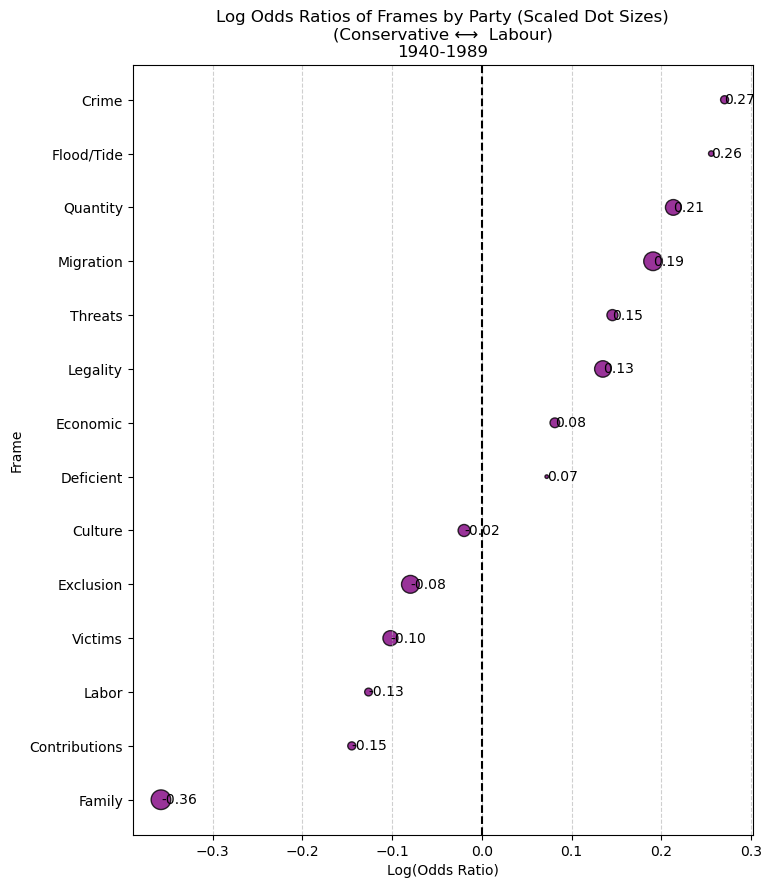

In [53]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
# Sort the frames by log odds for better visualization
frame_counts = frame_counts.sort_values(by='Log_Odds')

# Calculate dot sizes based on total token counts (Conservative + Labour)
frame_counts['Dot_Size'] = frame_counts['Conservative'] + frame_counts['Labour']

# Normalize dot sizes for better visualization (optional scaling factor)
frame_counts['Dot_Size'] = frame_counts['Dot_Size'] / frame_counts['Dot_Size'].max() * 200  # Scale sizes

# Plot the dot plot with scaled dot sizes
plt.figure(figsize=(8, 10))
plt.scatter(
    frame_counts['Log_Odds'], 
    frame_counts['Frame'], 
    s=frame_counts['Dot_Size'],  # Scale dot sizes
    color='purple', 
    alpha=0.8,  # Transparency
    edgecolor='black'
)

# Add a vertical line at log odds = 0
plt.axvline(0, color='black', linestyle='--')

# Annotate the dots with their log odds values
for i, row in frame_counts.iterrows():
    plt.text(row['Log_Odds'], row['Frame'], f"{row['Log_Odds']:.2f}", fontsize=10, va='center', ha='left')

# Add titles and labels
plt.title('Log Odds Ratios of Frames by Party (Scaled Dot Sizes)\n(Conservative ⟷  Labour)\n1940-1989')
plt.xlabel('Log(Odds Ratio)')
plt.ylabel('Frame')

# Add grid for better readability
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


            Frame  Conservative  Labour  Odds_Ratio  Log_Odds    Dot_Size  \
6          Family          4355    5787    0.699251 -0.357746  200.000000   
0   Contributions           822     883    0.864987 -0.145041   33.622560   
8           Labor           773     815    0.881293 -0.126365   31.315322   
12        Victims          2941    3026    0.903076 -0.101948  117.669099   
5       Exclusion          4160    4186    0.923405 -0.079687  164.582923   
2         Culture          1954    1852    0.980352 -0.019844   75.054230   
3       Deficient           177     153    1.074930  0.072255    6.507592   
4        Economic          1332    1141    1.084718  0.081320   48.767501   
9        Legality          3926    3188    1.144275  0.134771  140.287912   
11        Threats          1790    1438    1.156625  0.145506   63.656084   
13      Migration          5181    3978    1.210172  0.190762  180.615263   
10       Quantity          3710    2785    1.237790  0.213328  128.081246   

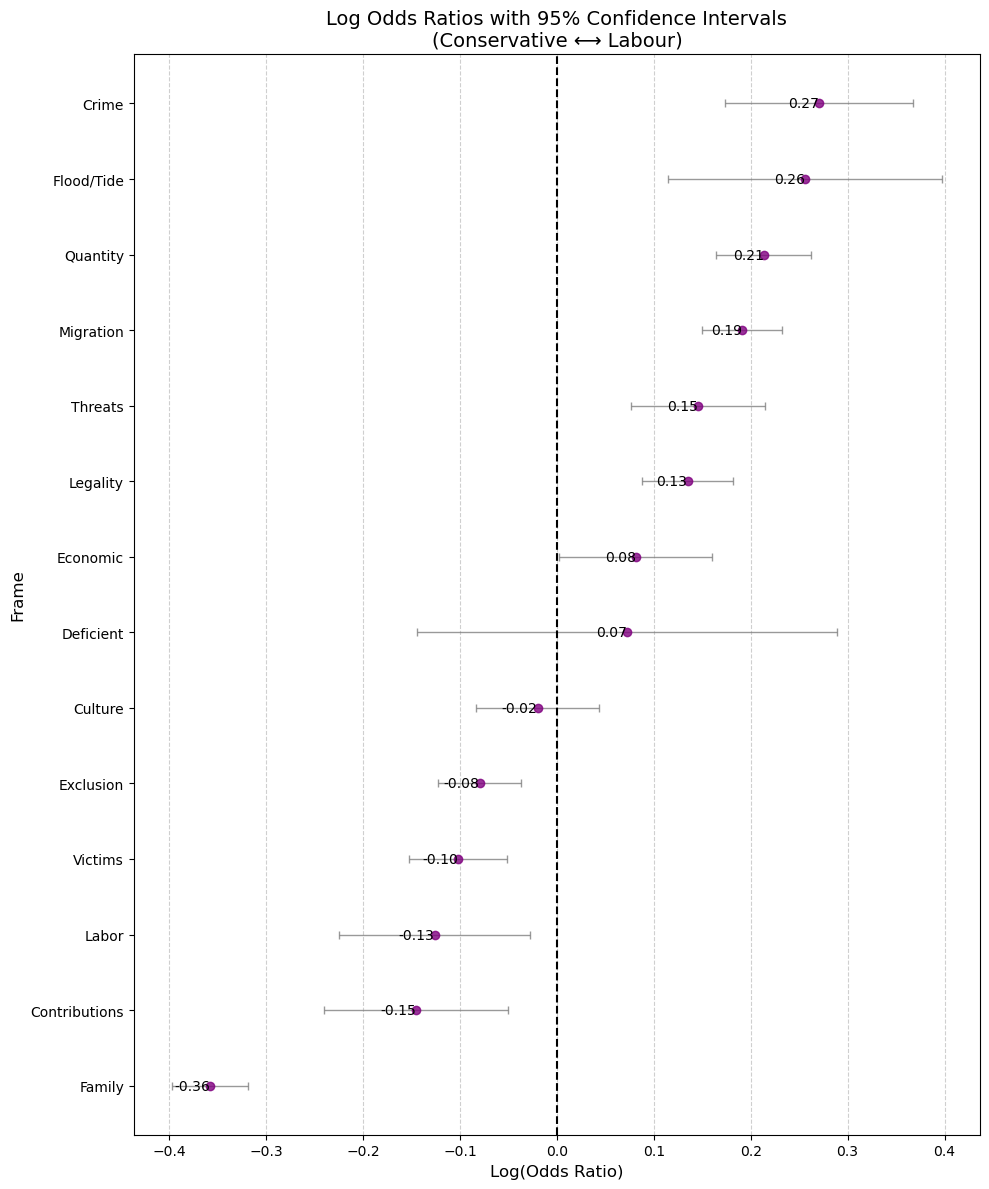

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Assuming your `frame_counts` DataFrame is already created and contains
# columns: 'Frame', 'Conservative', 'Labour'

# Total token counts for each party
total_conservative = frame_counts['Conservative'].sum()
total_labour = frame_counts['Labour'].sum()

# Calculate proportions for each frame
frame_counts['Prop_Conservative'] = frame_counts['Conservative'] / total_conservative
frame_counts['Prop_Labour'] = frame_counts['Labour'] / total_labour

# Calculate odds ratio
frame_counts['Odds_Ratio'] = frame_counts['Prop_Conservative'] / frame_counts['Prop_Labour']
frame_counts['Log_Odds'] = np.log(frame_counts['Odds_Ratio'])

# Confidence Intervals and p-values
alpha = 0.05  # Significance level (95% CI)
z = stats.norm.ppf(1 - alpha / 2)  # Critical value for two-tailed test

ci_lower = []
ci_upper = []
p_values = []

for index, row in frame_counts.iterrows():
    # Conservative and Labour counts
    con = row['Conservative']
    lab = row['Labour']

    # Calculate standard error of the log odds
    se_log_odds = np.sqrt(1 / con + 1 / lab)

    # Compute CI bounds for log odds
    ci_lower.append(row['Log_Odds'] - z * se_log_odds)
    ci_upper.append(row['Log_Odds'] + z * se_log_odds)

    # Compute z-score and p-value
    z_score = row['Log_Odds'] / se_log_odds
    p_values.append(2 * (1 - stats.norm.cdf(abs(z_score))))

# Add CI and p-value columns to DataFrame
frame_counts['CI_Lower'] = ci_lower
frame_counts['CI_Upper'] = ci_upper
frame_counts['P_Value'] = p_values

# Display updated DataFrame
print(frame_counts)

# Visualization: Dot Plot with CIs
plt.figure(figsize=(10, 12))
plt.errorbar(
    frame_counts['Log_Odds'], 
    frame_counts['Frame'], 
    xerr=[frame_counts['Log_Odds'] - frame_counts['CI_Lower'], 
          frame_counts['CI_Upper'] - frame_counts['Log_Odds']], 
    fmt='o', 
    color='purple', 
    ecolor='gray', 
    elinewidth=1, 
    capsize=3, 
    alpha=0.8
)

# Annotate the dots with their log odds values
for i, row in frame_counts.iterrows():
    plt.text(row['Log_Odds'], row['Frame'], f"{row['Log_Odds']:.2f}", fontsize=10, va='center', ha='right')

# Add a vertical line at log odds = 0
plt.axvline(0, color='black', linestyle='--')

# Add titles and labels
plt.title('Log Odds Ratios with 95% Confidence Intervals\n(Conservative ⟷ Labour)', fontsize=14)
plt.xlabel('Log(Odds Ratio)', fontsize=12)
plt.ylabel('Frame', fontsize=12)

# Add grid for readability
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


C:\Users\mitra\AppData\Local\Temp\ipykernel_66216\2860300720.py:41: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


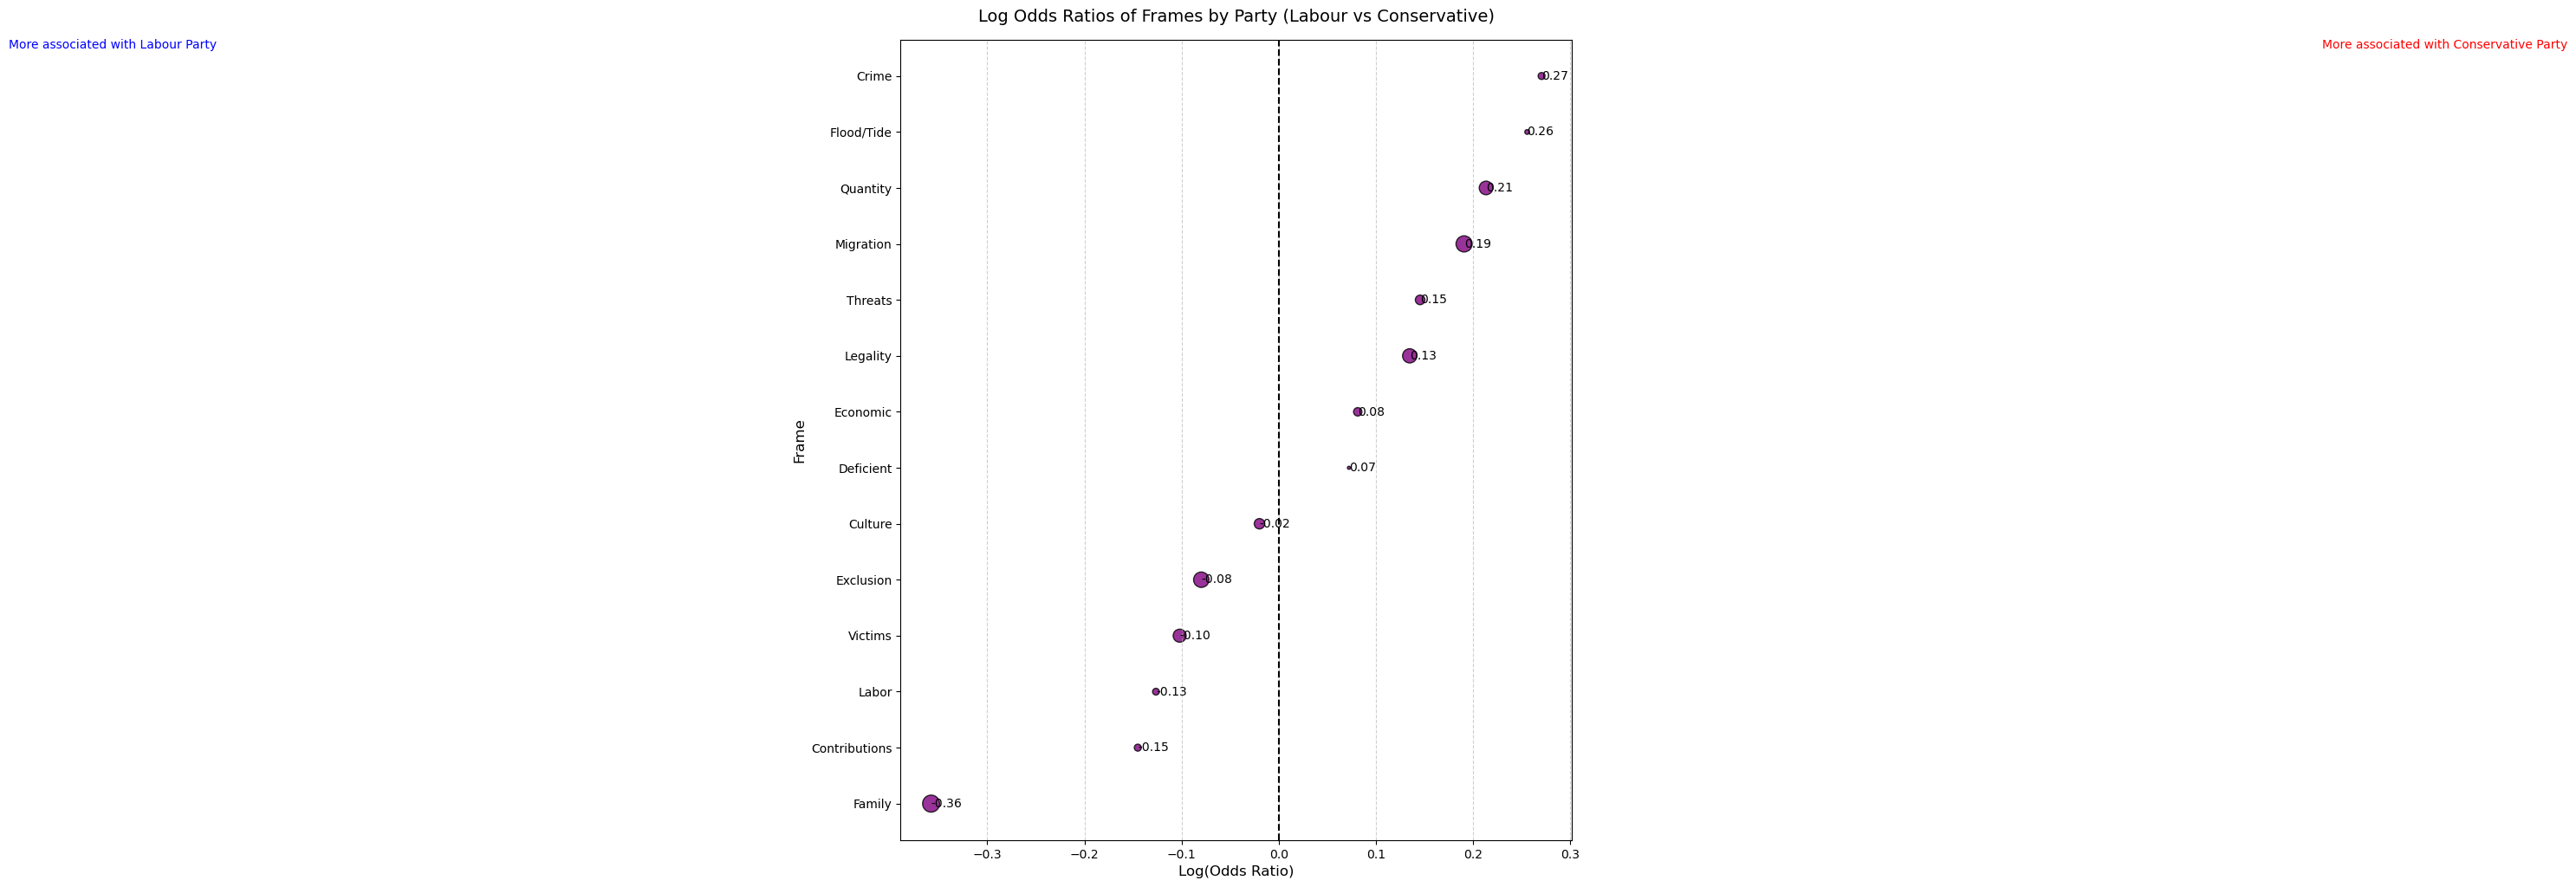

In [57]:
import matplotlib.pyplot as plt

# Sort the frames by log odds for better visualization
frame_counts = frame_counts.sort_values(by='Log_Odds')

# Calculate dot sizes based on total token counts (Conservative + Labour)
frame_counts['Dot_Size'] = frame_counts['Conservative'] + frame_counts['Labour']

# Normalize dot sizes for better visualization (optional scaling factor)
frame_counts['Dot_Size'] = frame_counts['Dot_Size'] / frame_counts['Dot_Size'].max() * 200  # Scale sizes

# Plot the dot plot with scaled dot sizes
plt.figure(figsize=(10, 12))
plt.scatter(
    frame_counts['Log_Odds'], 
    frame_counts['Frame'], 
    s=frame_counts['Dot_Size'],  # Scale dot sizes
    color='purple', 
    alpha=0.8,  # Transparency
    edgecolor='black'
)

# Add a vertical line at log odds = 0
plt.axvline(0, color='black', linestyle='--')

# Annotate the dots with their log odds values
for i, row in frame_counts.iterrows():
    plt.text(row['Log_Odds'], row['Frame'], f"{row['Log_Odds']:.2f}", fontsize=10, va='center', ha='left')

# Add titles and labels
plt.title('Log Odds Ratios of Frames by Party (Labour vs Conservative)', fontsize=14, pad=15)
plt.xlabel('Log(Odds Ratio)', fontsize=12)
plt.ylabel('Frame', fontsize=12)

# Add text annotations to clarify sides
plt.text(-1.2, len(frame_counts) - 0.5, "More associated with Labour Party", fontsize=10, color='blue', ha='center')
plt.text(1.2, len(frame_counts) - 0.5, "More associated with Conservative Party", fontsize=10, color='red', ha='center')

# Add grid for better readability
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [58]:
df.columns

Index(['id', 'speaker', 'date', 'title', 'contents', 'Party', 'label',
       'cleaned_contents', 'tokens', 'normalized_tokens', 'frame_tokens'],
      dtype='object')

In [59]:
df['Party'].unique()


array(['Conservative Party', 'Labour Party', 'Liberal Democrats'],
      dtype=object)

In [62]:
import pandas as pd

# Filter results for Conservative and Labour parties
conservative_df = df[df['Party'] == 'Conservative Party']
labour_df = df[df['Party'] == 'Labour Party']

# Initialize storage for frame probabilities
frame_probabilities = []

# Iterate through each frame
for frame, frame_terms in frame_words.items():
    # Extract tokens for the current frame for each party
    conservative_frame_tokens = [
        tokens.get(frame, []) for tokens in conservative_df['frame_tokens'] if frame in tokens
    ]
    labour_frame_tokens = [
        tokens.get(frame, []) for tokens in labour_df['frame_tokens'] if frame in tokens
    ]
    
    # Flatten tokens
    conservative_frame_tokens_flat = [word for doc in conservative_frame_tokens for word in doc]
    labour_frame_tokens_flat = [word for doc in labour_frame_tokens for word in doc]
    
    # Calculate probabilities (counts normalized by total tokens)
    conservative_prob = len(conservative_frame_tokens_flat) / len(conservative_df)
    labour_prob = len(labour_frame_tokens_flat) / len(labour_df)
    
    # Skip frames with insufficient data
    if len(conservative_frame_tokens_flat) < 10 or len(labour_frame_tokens_flat) < 10:
        continue
    
    # Store probabilities
    frame_probabilities.append({
        'Frame': frame,
        'Conservative_Probability': conservative_prob,
        'Labour_Probability': labour_prob
    })

# Convert to DataFrame
frame_prob_df = pd.DataFrame(frame_probabilities)

# Calculate odds and odds ratios
frame_prob_df['Conservative_Odds'] = frame_prob_df['Conservative_Probability'] / (1 - frame_prob_df['Conservative_Probability'])
frame_prob_df['Labour_Odds'] = frame_prob_df['Labour_Probability'] / (1 - frame_prob_df['Labour_Probability'])
frame_prob_df['Odds_Ratio'] = frame_prob_df['Conservative_Odds'] / frame_prob_df['Labour_Odds']

# Calculate overall odds ratio
total_conservative_prob = frame_prob_df['Conservative_Probability'].sum()
total_labour_prob = frame_prob_df['Labour_Probability'].sum()

total_conservative_odds = total_conservative_prob / (1 - total_conservative_prob)
total_labour_odds = total_labour_prob / (1 - total_labour_prob)
overall_odds_ratio = total_conservative_odds / total_labour_odds

# Display results
print("\nOdds Ratios by Frame:")
print(frame_prob_df)

print(f"\nOverall Odds Ratio (Conservative / Labour): {overall_odds_ratio:.2f}")



Odds Ratios by Frame:
            Frame  Conservative_Probability  Labour_Probability  \
0   Contributions                  0.183646            0.226294   
1           Crime                  0.221850            0.180420   
2         Culture                  0.436550            0.474628   
3       Deficient                  0.039544            0.039211   
4        Economic                  0.297587            0.292414   
5       Exclusion                  0.929401            1.072783   
6          Family                  0.972967            1.483086   
7      Flood/Tide                  0.102770            0.084828   
8           Labor                  0.172699            0.208867   
9        Legality                  0.877122            0.817017   
10       Quantity                  0.828865            0.713737   
11        Threats                  0.399911            0.368529   
12        Victims                  0.657060            0.775500   
13      Migration                  1.15

C:\Users\mitra\AppData\Local\Temp\ipykernel_66216\2134125469.py:35: RuntimeWarning: invalid value encountered in log
  log_odds_ratio = np.log(conservative_odds / labour_odds)


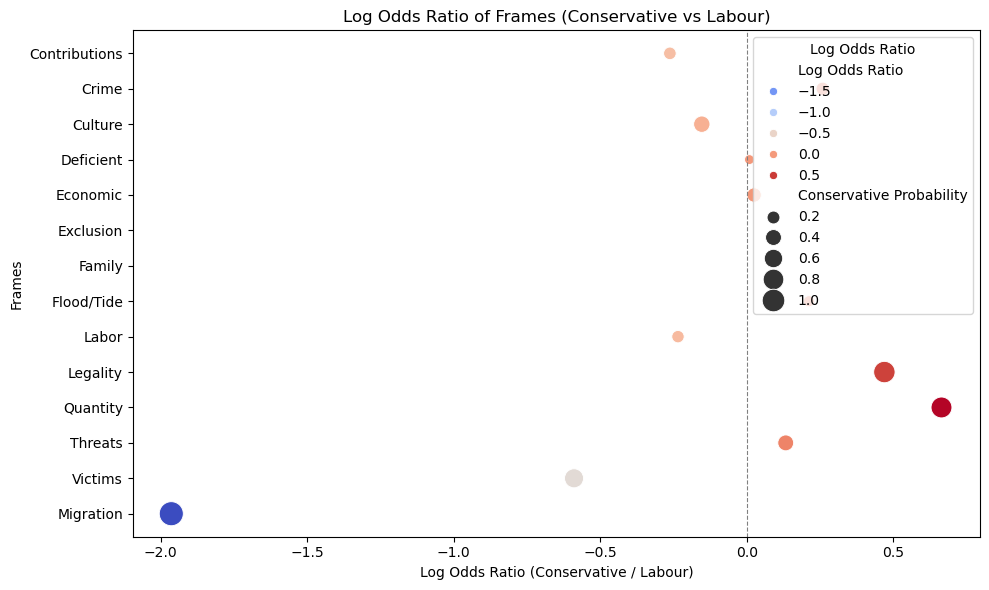

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for odds ratio calculation
log_odds_data = []

# Iterate through each frame
for frame, frame_terms in frame_words.items():
    # Extract tokens for each frame by party
    conservative_frame_tokens = [
        tokens.get(frame, []) for tokens in conservative_df['frame_tokens'] if frame in tokens
    ]
    labour_frame_tokens = [
        tokens.get(frame, []) for tokens in labour_df['frame_tokens'] if frame in tokens
    ]
    
    # Flatten tokens
    conservative_frame_tokens_flat = [word for doc in conservative_frame_tokens for word in doc]
    labour_frame_tokens_flat = [word for doc in labour_frame_tokens for word in doc]
    
    # Calculate probabilities (counts normalized by total tokens)
    conservative_prob = len(conservative_frame_tokens_flat) / len(conservative_df)
    labour_prob = len(labour_frame_tokens_flat) / len(labour_df)
    
    # Skip frames with insufficient data
    if len(conservative_frame_tokens_flat) < 10 or len(labour_frame_tokens_flat) < 10:
        continue
    
    # Calculate odds
    conservative_odds = conservative_prob / (1 - conservative_prob)
    labour_odds = labour_prob / (1 - labour_prob)
    
    # Log odds ratio
    log_odds_ratio = np.log(conservative_odds / labour_odds)
    
    # Append data for plotting
    log_odds_data.append({
        'Frame': frame,
        'Log Odds Ratio': log_odds_ratio,
        'Conservative Probability': conservative_prob,
        'Labour Probability': labour_prob
    })

# Convert to DataFrame
log_odds_df = pd.DataFrame(log_odds_data)

# Create scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Log Odds Ratio',
    y='Frame',
    size='Conservative Probability',  # Scale by probability
    hue='Log Odds Ratio',
    palette='coolwarm',
    data=log_odds_df,
    legend='brief',
    sizes=(50, 300)
)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)  # Add vertical line at 0
plt.title("Log Odds Ratio of Frames (Conservative vs Labour)")
plt.xlabel("Log Odds Ratio (Conservative / Labour)")
plt.ylabel("Frames")
plt.tight_layout()
plt.legend(title="Log Odds Ratio", loc='upper right')
plt.show()


In [66]:
df.head()

,id,speaker,date,title,contents,Party,label,cleaned_contents,tokens,normalized_tokens,frame_tokens
0,0,Sir J. Anderson,1940-02-06,Eire Citizens (Immigration),I have had no representations from the police ...,Conservative Party,neutral,i have had no representations from the police ...,"[representation, police, contrary]","[representation, police, contrary]","{'Contributions': [], 'Crime': [], 'Culture': ..."
1,1,Sir J. Anderson,1940-02-06,Eire Citizens (Immigration),"No, Sir. Even if the principle underlying the ...",Conservative Party,neutral,no sir even if the principle underlying the ri...,"[sir, principle, underlie, right, hon, gentlem...","[sir, principle, underlie, right, hon, gentlem...","{'Contributions': [], 'Crime': [], 'Culture': ..."
2,2,Mr. M. MacDonald,1940-02-14,Palestine (Jewish Immigration),The steady improvement in the internal situati...,Labour Party,pro,the steady improvement in the internal situati...,"[steady, improvement, internal, situation, pal...","[steady, improvement, internal, situation, pal...","{'Contributions': [], 'Crime': [], 'Culture': ..."
3,3,Mr. MacDonald,1940-02-14,Palestine (Jewish Immigration),"The legal quota allowed something over 10,000 ...",Labour Party,neutral,the legal quota allowed something over jews to...,"[legal, quota, allow, jews, settle, palestine,...","[legal, quota, allow, jew, settle, palestine, ...","{'Contributions': [], 'Crime': [], 'Culture': ..."
4,4,Mr. MacDonald,1940-02-14,Palestine (Jewish Immigration),That is another question.,Labour Party,neutral,that is another question,[question],[question],"{'Contributions': [], 'Crime': [], 'Culture': ..."


In [67]:
df.columns

Index(['id', 'speaker', 'date', 'title', 'contents', 'Party', 'label',
       'cleaned_contents', 'tokens', 'normalized_tokens', 'frame_tokens'],
      dtype='object')

In [71]:
print(len(df))

9061


In [73]:
import pandas as pd
import ast

# Import the dictionaries from your script
from group_terms import get_group_terms, get_regions_and_regionalities

print(df.columns)

# Check the structure of the `tokens` column
print("Checking tokens column:")
print(df['tokens'].head())
print(type(df['tokens'].iloc[0]))

# Step 1: Convert `tokens` column from strings to lists if necessary
def convert_to_list(value):
    if isinstance(value, str):
        try:
            return ast.literal_eval(value)  # Convert string representation of list to actual list
        except Exception as e:
            print(f"Error converting {value}: {e}")
            return []
    return value if isinstance(value, list) else []

df['tokens'] = df['tokens'].apply(convert_to_list)

# Verify the conversion
print("Tokens column after conversion:")
print(df['tokens'].head())

# Step 2: Normalize tokens to lowercase
df['tokens'] = df['tokens'].apply(lambda x: [t.lower() for t in x] if isinstance(x, list) else [])

# Step 3: Load the dictionaries and normalize them to lowercase
countries, nationalities = get_group_terms()
regions, regionalities = get_regions_and_regionalities()

country_terms = {term.lower(): country for country, terms in countries.items() for term in terms}
nationality_terms = {term.lower(): nationality for nationality, terms in nationalities.items() for term in terms}
region_terms = {term.lower(): region for region, countries in regions.items() for term in countries}

# Step 4: Function to extract matches from tokens
def extract_matches(tokens, term_dict):
    if isinstance(tokens, list):  # Ensure tokens is a list
        matches = [term_dict[token] for token in tokens if token in term_dict]
        return list(set(matches))  # Remove duplicates
    return []  # Return an empty list if tokens is not valid

# Step 5: Apply the functions to extract countries, nationalities, and regions
df['identified_countries'] = df['tokens'].apply(lambda x: extract_matches(x, country_terms))
df['identified_nationalities'] = df['tokens'].apply(lambda x: extract_matches(x, nationality_terms))
df['identified_regions'] = df['tokens'].apply(lambda x: extract_matches(x, region_terms))

# Step 6: Flatten the identified countries to calculate their frequency
all_countries = df['identified_countries'].explode().dropna().tolist()
country_counts = pd.Series(all_countries).value_counts().reset_index()
country_counts.columns = ['Country', 'Frequency']

# Step 7: Get the top 14 most mentioned countries
top_14_countries = country_counts.head(14)['Country'].tolist()

# Output the results
print("Top 14 countries mentioned:")
print(top_14_countries)

# Save the country counts to a CSV for reference
country_counts.to_csv("country_counts.csv", index=False)

# Save the updated DataFrame for further analysis
df.to_csv("updated_dataset_with_identified_terms.csv", index=False)

# Debugging step: Print rows with identified countries
print("Rows with identified countries:")
print(df[['tokens', 'identified_countries']].head(20))


Index(['id', 'speaker', 'date', 'title', 'contents', 'Party', 'label',
       'cleaned_contents', 'tokens', 'normalized_tokens', 'frame_tokens'],
      dtype='object')
Checking tokens column:
0                   [representation, police, contrary]
1    [sir, principle, underlie, right, hon, gentlem...
2    [steady, improvement, internal, situation, pal...
3    [legal, quota, allow, jews, settle, palestine,...
4                                           [question]
Name: tokens, dtype: object
<class 'list'>
Tokens column after conversion:
0                   [representation, police, contrary]
1    [sir, principle, underlie, right, hon, gentlem...
2    [steady, improvement, internal, situation, pal...
3    [legal, quota, allow, jews, settle, palestine,...
4                                           [question]
Name: tokens, dtype: object
Top 14 countries mentioned:
['India', 'Pakistan', 'Bangladesh', 'Australia', 'Canada', 'Germany', 'Kenya', 'France', 'Uganda', 'Ireland', 'Jamaica', 'Niger

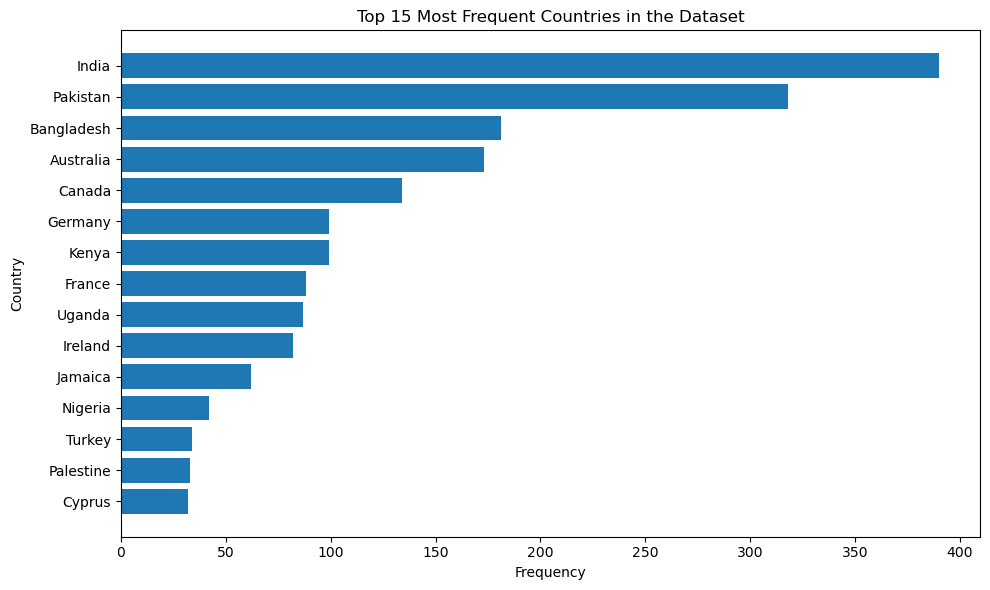

Top 15 countries table saved to: top_15_countries_with_frequencies.csv
Top 15 Most Frequent Countries with Frequencies:
       Country  Frequency
0        India        390
1     Pakistan        318
2   Bangladesh        181
3    Australia        173
4       Canada        134
5      Germany         99
6        Kenya         99
7       France         88
8       Uganda         87
9      Ireland         82
10     Jamaica         62
11     Nigeria         42
12      Turkey         34
13   Palestine         33
14      Cyprus         32


In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the `df` DataFrame already contains the `identified_countries` column

# Flatten the identified_countries column to calculate frequency
all_countries = df['identified_countries'].explode().dropna()
country_counts = all_countries.value_counts().reset_index()
country_counts.columns = ['Country', 'Frequency']

# Filter for the top 15 most frequent countries
top_15_countries = country_counts.head(15)

# Generate the plot
plt.figure(figsize=(10, 6))
plt.barh(top_15_countries['Country'][::-1], top_15_countries['Frequency'][::-1])
plt.title("Top 15 Most Frequent Countries in the Dataset")
plt.xlabel("Frequency")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

# Save the table as a CSV file for reference
output_csv = "top_15_countries_with_frequencies.csv"
top_15_countries.to_csv(output_csv, index=False)
print(f"Top 15 countries table saved to: {output_csv}")

# Display the table directly in the console
print("Top 15 Most Frequent Countries with Frequencies:")
print(top_15_countries)


Top entities (countries, mapped nationalities, regions):
            Entity  Frequency
0       South_Asia        621
1            India        390
2         Pakistan        318
3   Western_Europe        232
4       Bangladesh        181
5        Australia        173
6     Commonwealth        158
7           Canada        134
8          Germany         99
9            Kenya         99
10     East_Africa         92
11          France         88
12          Uganda         87
13         Ireland         82
14       East_Asia         74


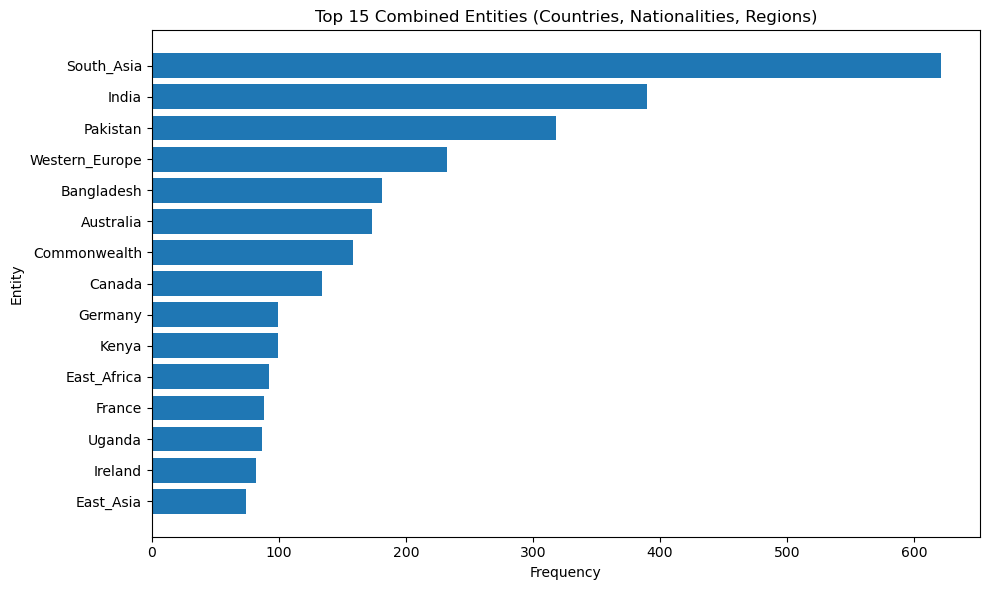

In [75]:
# Combine the mappings for countries, nationalities, and regions
combined_mapping = {**{term.lower(): country for country, terms in countries.items() for term in terms},
                    **{term.lower(): country for country, terms in nationalities.items() for term in terms},
                    **{term.lower(): country for country, terms in regions.items() for term in terms}}

# Function to map nationalities and regions to countries
def map_to_country(items, mapping):
    if isinstance(items, list):
        return [mapping[item.lower()] for item in items if item.lower() in mapping]
    return []

# Replace nationalities and regions with their corresponding countries
df['mapped_nationalities'] = df['identified_nationalities'].apply(lambda x: map_to_country(x, combined_mapping))
df['mapped_regions'] = df['identified_regions'].apply(lambda x: map_to_country(x, combined_mapping))

# Combine all identified entities into a single column
df['all_identified'] = df['identified_countries'] + df['mapped_nationalities'] + df['mapped_regions']

# Remove duplicates in the combined column
df['all_identified'] = df['all_identified'].apply(lambda x: list(set(x)) if isinstance(x, list) else [])

# Flatten the combined column for frequency analysis
all_combined = df['all_identified'].explode().dropna()
combined_counts = all_combined.value_counts().reset_index()
combined_counts.columns = ['Entity', 'Frequency']

# Output the results
print("Top entities (countries, mapped nationalities, regions):")
print(combined_counts.head(15))

# Save the table for reference
combined_counts.to_csv("combined_entities_with_frequencies.csv", index=False)

# Plot the top 15 combined entities
top_combined = combined_counts.head(15)
plt.figure(figsize=(10, 6))
plt.barh(top_combined['Entity'][::-1], top_combined['Frequency'][::-1])
plt.title("Top 15 Combined Entities (Countries, Nationalities, Regions)")
plt.xlabel("Frequency")
plt.ylabel("Entity")
plt.tight_layout()
plt.show()


In [79]:
df.columns

Index(['id', 'speaker', 'date', 'title', 'contents', 'Party', 'label',
       'cleaned_contents', 'tokens', 'normalized_tokens', 'frame_tokens',
       'identified_countries', 'identified_nationalities',
       'identified_regions', 'mapped_nationalities', 'mapped_regions',
       'all_identified'],
      dtype='object')

In [81]:
df.head()

,id,speaker,date,title,contents,Party,label,cleaned_contents,tokens,normalized_tokens,frame_tokens,identified_countries,identified_nationalities,identified_regions,mapped_nationalities,mapped_regions,all_identified
0,0,Sir J. Anderson,1940-02-06,Eire Citizens (Immigration),I have had no representations from the police ...,Conservative Party,neutral,i have had no representations from the police ...,"[representation, police, contrary]","[representation, police, contrary]","{'Contributions': [], 'Crime': [], 'Culture': ...",[],[],[],[],[],[]
1,1,Sir J. Anderson,1940-02-06,Eire Citizens (Immigration),"No, Sir. Even if the principle underlying the ...",Conservative Party,neutral,no sir even if the principle underlying the ri...,"[sir, principle, underlie, right, hon, gentlem...","[sir, principle, underlie, right, hon, gentlem...","{'Contributions': [], 'Crime': [], 'Culture': ...",[],[],[],[],[],[]
2,2,Mr. M. MacDonald,1940-02-14,Palestine (Jewish Immigration),The steady improvement in the internal situati...,Labour Party,pro,the steady improvement in the internal situati...,"[steady, improvement, internal, situation, pal...","[steady, improvement, internal, situation, pal...","{'Contributions': [], 'Crime': [], 'Culture': ...",[Palestine],[],[Middle_East],[],[],[Palestine]
3,3,Mr. MacDonald,1940-02-14,Palestine (Jewish Immigration),"The legal quota allowed something over 10,000 ...",Labour Party,neutral,the legal quota allowed something over jews to...,"[legal, quota, allow, jews, settle, palestine,...","[legal, quota, allow, jew, settle, palestine, ...","{'Contributions': [], 'Crime': [], 'Culture': ...",[Palestine],[],[Middle_East],[],[],[Palestine]
4,4,Mr. MacDonald,1940-02-14,Palestine (Jewish Immigration),That is another question.,Labour Party,neutral,that is another question,[question],[question],"{'Contributions': [], 'Crime': [], 'Culture': ...",[],[],[],[],[],[]


In [83]:
df['tokens'][3271]

['noble',
 'lord',
 'forgive',
 'excuse',
 'think',
 'marginal',
 'note',
 'hope',
 'minister',
 'go',
 'reply',
 'help',
 'marginal',
 'note',
 'marginal',
 'note',
 'true',
 'look',
 'clause',
 'deal',
 'simply',
 'seaman',
 'read',
 'obvious',
 'deal',
 'seaman']

In [85]:
df['identified_countries'][3271]

[]

In [87]:
df['identified_nationalities'][3271]

[]

In [89]:
df['identified_countries'][3271]

[]

In [91]:
df['identified_regions'][3271]

[]

In [93]:
df['mapped_nationalities'][3271]

[]

In [95]:
df['mapped_regions'][3271]

[]

In [97]:
df['all_identified'][3271]

[]

In [99]:
import os

# Ensure the directory exists
os.makedirs("newdata", exist_ok=True)

# Save the dataset
output_path = "newdata/countries.csv"
df.to_csv(output_path, index=False)
print(f"Dataset saved successfully to {output_path}")


PermissionError: [Errno 13] Permission denied: 'newdata/countries.csv'